# Solutions to the 1D Schrodinger Equation

Here we present code to numerically solve the one-dimensional time-independent Schrodinger Equation for arbitrary potentials and boundary conditions of an infinite potential well (this is necessary to treat boundary conditions when discretizing the Hilbert Space basis so we can obtain numerical solutions)

In [1]:
# all imports here
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

In [46]:
# all predefined functions and constants here
h_bar = 1

def infinite_well(x):
  return x * 0

def harmonic_oscillator(x,m,w):
  return m*w/2*(x-.5)**2

def gaussian(x,a,sigma):
  return a * np.exp(-(x-.5)**2/(2*sigma**2))

def delta_function(x,c):
  g = 0.001
  return 1/g * (np.heaviside(x-(.5 -c - g),0) + np.heaviside(-(x-(.5 -c+ g)),0)-1)

def finite_well(x,a,d):
  return a*(np.heaviside(x-(.5 + d),0)+np.heaviside(-(x-(.5 - d)),0))

In [69]:
# all inputs here
L = 1
n = 4000
m = 1

V = lambda x : harmonic_oscillator(x,2,1)

num_sols = 6 # first num_sols eigenfunctions plotted
chart_title = "1D Schrodinger Solutions"

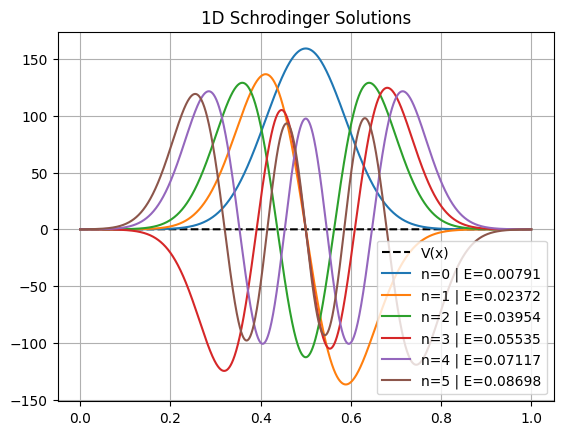

In [70]:
# evaluate result
dx = L/n
x = np.linspace(0,L,n)
v = V(x)

# find eigenvalues and eigenvectors
diag = v + h_bar**2 / (2*m) * (1/dx) * np.ones(n)
off_diags = np.ones(n-1)/(2*dx)*-1*h_bar**2/(2*m)
evals,evects = eigh_tridiagonal(d=diag,e=off_diags)
evects = evects.T
epairs = [(evals[i],evects[i]) for i in range(n)]

# plot potential
plt.plot(x,v/2,"--",color="#000000",label="V(x)")
plt.title(chart_title)

# plot wavefunctions
for i in range(num_sols):

  psi = epairs[i][1]
  energy = epairs[i][0]

  # first normalize the function
  s = 0
  for j in range(n-1):
    s += (psi[j].real**2 + psi[j].imag**2 + psi[j+1].real**2 + psi[j+1].imag**2)/2 * dx
  psi /= s

  # then plot
  plt.plot(x,psi,label=f"n={i} | E={energy:.5f}")

fig = plt.gcf()
ax = plt.gca()
ax.grid()
plt.legend(loc="lower right")